In [67]:
import numpy as np
import pandas as pd
from functools import reduce
from scipy.stats import ortho_group
import copy
from itertools import product
import datetime
from ast import literal_eval
from scipy import linalg
from scipy.stats import ortho_group
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import plotly.express as px
import plotly
import datetime
np.set_printoptions(precision=8, suppress=True)

from MPS_functions import *

#import os 
#os.environ['R_HOME'] = '/gpfs/sharedfs1/admin/hpc2.0/apps/r/4.2.2/lib64/R'
#os.environ['LD_LIBRARY_PATH'] = '/gpfs/sharedfs1/admin/hpc2.0/apps/r/4.2.2/lib64/R/library' 

# module load r/4.2.2
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

import tensorflow as tf

In [6]:
import yfinance as yf

# Define the stock symbol
symbol = 'NVDA'

# Download the daily stock data
data = yf.download(symbol, start='2019-01-01', end='2023-12-31', interval='1d')

# Save data to a CSV file
data.to_csv('NVDA_daily_data.csv')

# Display the data (optional)
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price      Adj Close    Close     High      Low     Open     Volume
Ticker          NVDA     NVDA     NVDA     NVDA     NVDA       NVDA
Date                                                               
2019-01-02  3.378090  3.40550  3.46200  3.25125  3.26600  508752000
2019-01-03  3.173996  3.19975  3.37900  3.19225  3.34475  705552000
2019-01-04  3.377346  3.40475  3.44325  3.24250  3.27350  585620000
2019-01-07  3.556145  3.58500  3.62225  3.41075  3.46250  709160000
2019-01-08  3.467614  3.49575  3.66950  3.42250  3.66725  786016000


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Generate or load your time series data (random example here)
np.random.seed(42)
data = np.random.randn(100)  # Example time series data

# Function to create lagged features
def create_lagged_features(series, lag=3):
    X = []
    y = []
    for i in range(len(series) - lag):
        X.append(series[i:i+lag])  # Create feature from the previous 'lag' values
        y.append(series[i+lag])    # Target is the next value in the series
    return np.array(X), np.array(y)

# Create lagged features (e.g., using the past 3 days to predict the next day's value)
lag = 3
X, y = create_lagged_features(data, lag)

# Split the data into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)




RandomForestRegressor(random_state=42)

In [22]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test[0:1, :])

# Evaluate the model (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Plot the predictions vs actual values
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Random Forest Time Series Forecasting')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [20, 1]

In [27]:
y_pred = rf_model.predict(X_test[0:1, :])

In [29]:
y_pred[0]

-0.7167156520222173

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


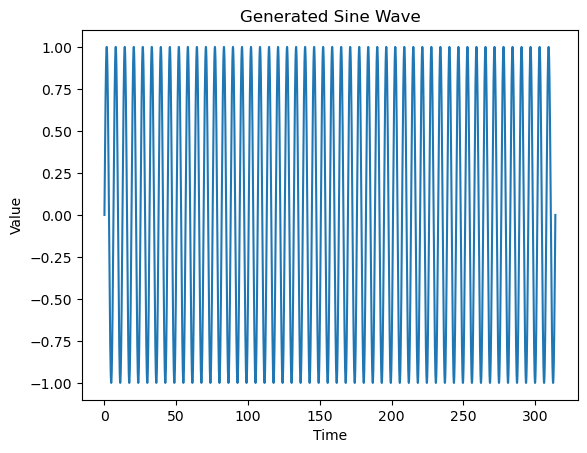

In [2]:
# Generate a simple sine wave as an example of univariate time series data
def generate_sine_wave(periods=50, points_per_period=200):
    time = np.linspace(0, periods * 2 * np.pi, periods * points_per_period)
    values = np.sin(time)  # Sine wave values
    return time, values

time, values = generate_sine_wave()

# Visualize the time series data
plt.plot(time, values)
plt.title("Generated Sine Wave")
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


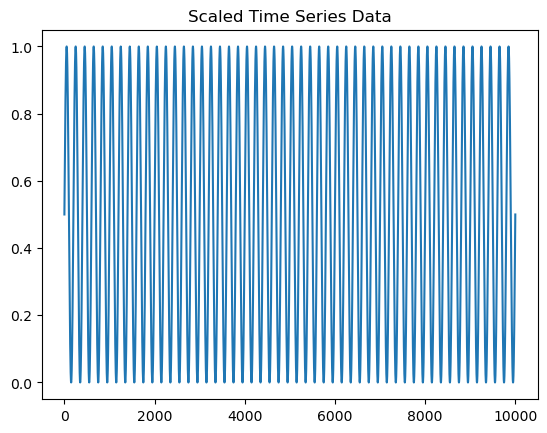

In [3]:
# Reshape the data for scaling (it needs to be 2D for MinMaxScaler)
scaler = MinMaxScaler(feature_range=(0, 1))
values = values.reshape(-1, 1)  # Reshape to 2D for scaling
scaled_values = scaler.fit_transform(values)

# Plot scaled values
plt.plot(scaled_values)
plt.title("Scaled Time Series Data")
plt.show()


In [4]:
# Create dataset with X as input and y as target
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # Use previous time_step values
        y.append(data[i + time_step, 0])      # Predict the next value
    return np.array(X), np.array(y)

# Define time step (number of previous time steps used to predict the next)
time_step = 100

# Create dataset
X, y = create_dataset(scaled_values, time_step)

# Reshape X to be 3D for LSTM: [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Show shape of the dataset
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (9899, 100, 1)
y shape: (9899,)


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Show shape of the split data
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (7919, 100, 1)
y_train shape: (7919,)
X_test shape: (1980, 100, 1)
y_test shape: (1980,)


In [6]:
# Build the LSTM model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

# Add a Dense layer for output (predicting 1 value)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


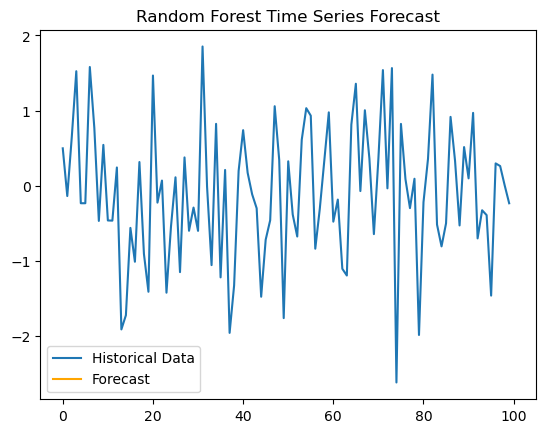

In [4]:
# Forecast future values (e.g., predict the next 10 values)
future_steps = 1
forecast = []

# Start with the last observed values in the dataset (using the last 'lag' values as input)
current_input = X[-1].reshape(1, -1)

for _ in range(future_steps):
    next_value = rf_model.predict(current_input)[0]  # Predict the next value
    forecast.append(next_value)
    
    # Update the current input for the next prediction
    current_input = np.roll(current_input, shift=-1, axis=1)  # Shift the input
    current_input[0, -1] = next_value  # Append the predicted value

# Plot the historical and forecasted data
plt.plot(np.arange(len(data)), data, label='Historical Data')
plt.plot(np.arange(len(data), len(data) + future_steps), forecast, label='Forecast', color='orange')
plt.legend()
plt.title('Random Forest Time Series Forecast')
plt.show()


In [5]:
print(pd.__version__)

2.1.4


In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np


In [8]:
import numpy as np
import tensorflow as tf

def create_dataset(series, lookback=10, horizon=1):
    """
    Converts a univariate time series into input-output pairs for forecasting.

    Args:
    - series: The univariate time series.
    - lookback: The number of previous time steps used as input (input sequence length).
    - horizon: The number of future time steps to predict (forecasting window).

    Returns:
    - X: Input sequence data of shape (samples, lookback, 1)
    - y: Target forecasted data of shape (samples, horizon)
    """
    X, y = [], []
    for i in range(len(series) - lookback - horizon + 1):
        X.append(series[i:i + lookback])
        y.append(series[i + lookback:i + lookback + horizon])
    return np.array(X), np.array(y)

# Example univariate time series (e.g., daily temperature, stock price, etc.)
data = np.sin(np.linspace(0, 100, 500))  # Example sinusoidal data

lookback = 10   # Use 10 time steps as input
horizon = 1     # Predict the next time step

X, y = create_dataset(data, lookback, horizon)

# Normalize data (optional, but generally recommended for time series forecasting)
X = X / np.max(X)
y = y / np.max(y)

# Split data into training and testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [14]:
from tensorflow.keras import layers, Model

def build_decoder_only_transformer(input_shape, num_heads=8, ff_dim=64, num_layers=4):
    inputs = layers.Input(shape=input_shape)
    
    # Positional Encoding
    positional_encoding = layers.Embedding(input_dim=input_shape[0], output_dim=input_shape[0])(inputs)
    
    # Decoder-only transformer block
    x = positional_encoding
    for _ in range(num_layers):
        # Multi-Head Attention
        attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=input_shape[-1])(x, x)
        x = layers.Add()([x, attention_output])  # Add & Normalize (Skip connection)
        x = layers.LayerNormalization()(x)
        
        # Feed-forward network
        ff_output = layers.Dense(ff_dim, activation='relu')(x)
        ff_output = layers.Dense(input_shape[-1])(ff_output)
        x = layers.Add()([x, ff_output])  # Add & Normalize (Skip connection)
        x = layers.LayerNormalization()(x)

    # Output layer
    outputs = layers.Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Build the model
model = build_decoder_only_transformer(input_shape=(lookback, 1), num_heads=8, ff_dim=64, num_layers=2)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 10, 1, 10) │        100 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 10, 1, 10) │        354 │ embedding_2[0][0… │
│ (MultiHeadAttentio… │                   │            │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 10, 1, 10) │          0 │ embedding_2[0][0… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 1, 10) │         20 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 10, 1, 64) │        704 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10, 1, 1)  │         65 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 10, 1, 10) │          0 │ layer_normalizat… │
│                     │                   │            │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 1, 10) │         20 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 10, 1, 10) │        354 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 10, 1, 10) │          0 │ layer_normalizat… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 1, 10) │         20 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 10, 1, 64) │        704 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 10, 1, 1)  │         65 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 10, 1, 10) │          0 │ layer_normalizat… │
│                     │                   │            │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 1, 10) │         20 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 10, 1, 10) │        354 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 10, 1, 10) │          0 │ layer_normalizat… │
│                     │                   │            │ multi_head_atten

 Total params: 4,763 (18.61 KB)

 Trainable params: 4,763 (18.61 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4900 - mae: 0.6284 
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5083 - mae: 0.6450 
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4911 - mae: 0.6222
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5358 - mae: 0.6600 
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4935 - mae: 0.6345


In [65]:
def forecast(model, input_seq, n_steps):
    """
    Generate forecasted values for the next n_steps given the input sequence.

    Args:
    - model: The trained model.
    - input_seq: The input sequence to predict from.
    - n_steps: The number of future steps to forecast.

    Returns:
    - forecast: The forecasted values for the next n_steps.
    """
    forecast = []
    current_input = input_seq

    for _ in range(n_steps):
        pred = model.predict(current_input[np.newaxis, :])  # Add batch dimension
        forecast.append(pred[0, 0])  # Extract forecasted value
        current_input = np.roll(current_input, -1, axis=0)  # Shift the input sequence
        current_input[-1] = pred[0, 0]  # Append the predicted value

    return np.array(forecast)

# Example: Forecast the next 10 steps
input_seq = X_test[0]  # Take a sample from the test set
forecasted_values = forecast(model, input_seq, n_steps=1)

print("Forecasted Values:", forecasted_values)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Forecasted Values: [[[0.04598209]]]


/var/folders/cd/td3wbwf12nj440jmcp6rh3w00000gn/T/ipykernel_3675/2753679670.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = pred[0, 0]  # Append the predicted value


In [68]:
T = 3000
file_path = 'Loss_transformer.csv'
np.random.seed(2024)
y = DGP_TAR(0.6,-0.8, 1.0, T)
lookback = 10
x_train, y_train = create_sequences(y.reshape((-1, 1)), lookback)

In [69]:
model = build_decoder_only_transformer(input_shape=(lookback, 1), num_heads=8, ff_dim=64, num_layers=2)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [29]:
X_test[0][:, np.newaxis]

array([[-0.01729712],
       [-0.21598433],
       [-0.4060265 ],
       [-0.57981696],
       [-0.73039951],
       [-0.8517469 ],
       [-0.93900205],
       [-0.98867247],
       [-0.99877003],
       [-0.96889056]])

In [16]:
tf.nn.softmax(predictions).numpy()

array([[0.07783648, 0.09868747, 0.14158392, 0.08270716, 0.0851117 ,
        0.13344775, 0.10121278, 0.05369856, 0.11599401, 0.1097202 ]],
      dtype=float32)

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.8594 - loss: 0.4777
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.9562 - loss: 0.1516
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.9675 - loss: 0.1102
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.9720 - loss: 0.0908
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.9780 - loss: 0.0730


In [11]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 326us/step - accuracy: 0.9763 - loss: 0.0810


[0.08095980435609818, 0.9763000011444092]

In [12]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [18]:
np.argmax(probability_model(x_test[:5]))

12

In [2]:
T1 = 2000
T2 = 1000
np.random.seed(2024)
Tr = robjects.FloatVector([T1+T2])
robjects.r.assign('Tr', Tr)
yr = DGP_ARMA(alpha=0.3, beta=0.3, T=T1, scale=0.1)
yr = DGP_AR(alpha=0.3, T=T2, scale=0.1, pre_y=yr)

In [4]:

yr.shape

(3000,)

In [1]:
np.multiply(np.arange(3), np.arange(2,4))

NameError: name 'np' is not defined